In [ ]:
import datetime as dt
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import plot
from matplotlib import pyplot
%matplotlib inline

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_raw = pd.read_csv('tdm_raw.csv')
data_raw.head()

,date,Consumption,Government Final Consumption Expenditure,Gross Fixed Capital Formation,Exports of Goods and Services,Imports of Goods and Services (-),Gross Domestic Product,Final consumption expenditure of resident households and consumption of NPISH,Government Final Consumption Expenditure.1,Exports of Goods and Services.1,Imports of Goods and Services (-).1,Gross Domestic Product.1,Gross Fixed Capital Formation.1
0,Mar-06,131106.3418,22156.58093,43654.47996,33566.67767,43768.30406,161135.9925,139242.5758,30221.90260,49041.65673,63934.50847,215560.3781,61875.49292
1,Jun-06,147313.2083,25164.61856,57458.61121,42411.52468,54836.31679,193081.3727,154324.2684,32251.08049,49979.70553,65691.45104,245630.9724,72472.37621
2,Sep-06,154770.1057,25816.63201,59866.01691,48175.24106,54834.45429,217039.4265,157504.4940,32819.46443,54329.98112,60628.22003,263200.7674,67554.59378
3,Dec-06,160980.5869,29574.73775,65433.53503,46717.62086,55711.67783,217970.7635,158393.2905,36284.67217,57002.91100,65466.95991,265540.4740,72104.75832
4,Mar-07,148323.5505,27043.60543,51647.40056,44021.82102,55140.84628,189593.4080,145464.3594,32388.60344,55404.93067,68565.18246,233397.0186,63588.28395


In [ ]:
col_names = ['date','C_nom', 'G_nom', 'I_nom', 'E_nom', 'IM_nom', 'GDP_nom', 'C', 'G', 'E', 'IM', 'GDP', 'I']
data_raw.columns=col_names
data_raw.head()

,date,C_nom,G_nom,I_nom,E_nom,IM_nom,GDP_nom,C,G,E,IM,GDP,I
0,Mar-06,131106.3418,22156.58093,43654.47996,33566.67767,43768.30406,161135.9925,139242.5758,30221.90260,49041.65673,63934.50847,215560.3781,61875.49292
1,Jun-06,147313.2083,25164.61856,57458.61121,42411.52468,54836.31679,193081.3727,154324.2684,32251.08049,49979.70553,65691.45104,245630.9724,72472.37621
2,Sep-06,154770.1057,25816.63201,59866.01691,48175.24106,54834.45429,217039.4265,157504.4940,32819.46443,54329.98112,60628.22003,263200.7674,67554.59378
3,Dec-06,160980.5869,29574.73775,65433.53503,46717.62086,55711.67783,217970.7635,158393.2905,36284.67217,57002.91100,65466.95991,265540.4740,72104.75832
4,Mar-07,148323.5505,27043.60543,51647.40056,44021.82102,55140.84628,189593.4080,145464.3594,32388.60344,55404.93067,68565.18246,233397.0186,63588.28395


In [ ]:
data_raw['NX'] = data_raw['E'] - data_raw['IM']
data_raw.head()

,date,C_nom,G_nom,I_nom,E_nom,IM_nom,GDP_nom,C,G,E,IM,GDP,I,NX
0,Mar-06,131106.3418,22156.58093,43654.47996,33566.67767,43768.30406,161135.9925,139242.5758,30221.90260,49041.65673,63934.50847,215560.3781,61875.49292,-14892.85174
1,Jun-06,147313.2083,25164.61856,57458.61121,42411.52468,54836.31679,193081.3727,154324.2684,32251.08049,49979.70553,65691.45104,245630.9724,72472.37621,-15711.74551
2,Sep-06,154770.1057,25816.63201,59866.01691,48175.24106,54834.45429,217039.4265,157504.4940,32819.46443,54329.98112,60628.22003,263200.7674,67554.59378,-6298.23891
3,Dec-06,160980.5869,29574.73775,65433.53503,46717.62086,55711.67783,217970.7635,158393.2905,36284.67217,57002.91100,65466.95991,265540.4740,72104.75832,-8464.04891
4,Mar-07,148323.5505,27043.60543,51647.40056,44021.82102,55140.84628,189593.4080,145464.3594,32388.60344,55404.93067,68565.18246,233397.0186,63588.28395,-13160.25179


In [ ]:
data_raw['year'] = data_raw['date'].apply(lambda x: '20' + x[4:])
data_raw.head()

,date,C_nom,G_nom,I_nom,E_nom,IM_nom,GDP_nom,C,G,E,IM,GDP,I,NX,year
0,Mar-06,131106.3418,22156.58093,43654.47996,33566.67767,43768.30406,161135.9925,139242.5758,30221.90260,49041.65673,63934.50847,215560.3781,61875.49292,-14892.85174,2006
1,Jun-06,147313.2083,25164.61856,57458.61121,42411.52468,54836.31679,193081.3727,154324.2684,32251.08049,49979.70553,65691.45104,245630.9724,72472.37621,-15711.74551,2006
2,Sep-06,154770.1057,25816.63201,59866.01691,48175.24106,54834.45429,217039.4265,157504.4940,32819.46443,54329.98112,60628.22003,263200.7674,67554.59378,-6298.23891,2006
3,Dec-06,160980.5869,29574.73775,65433.53503,46717.62086,55711.67783,217970.7635,158393.2905,36284.67217,57002.91100,65466.95991,265540.4740,72104.75832,-8464.04891,2006
4,Mar-07,148323.5505,27043.60543,51647.40056,44021.82102,55140.84628,189593.4080,145464.3594,32388.60344,55404.93067,68565.18246,233397.0186,63588.28395,-13160.25179,2007


In [ ]:
def changeMonthName(month):
  if month == 'Mar':
    month = 'March'
  elif month == 'Jun':
    month = 'June'
  elif month == 'Sep':
    month = 'September'
  else:
    month = 'December'
  return month

In [ ]:
data_raw['month'] = data_raw['date'].apply(lambda x: changeMonthName(x[0:3]))
data_raw.head()

,date,C_nom,G_nom,I_nom,E_nom,IM_nom,GDP_nom,C,G,E,IM,GDP,I,NX,year,month
0,Mar-06,131106.3418,22156.58093,43654.47996,33566.67767,43768.30406,161135.9925,139242.5758,30221.90260,49041.65673,63934.50847,215560.3781,61875.49292,-14892.85174,2006,March
1,Jun-06,147313.2083,25164.61856,57458.61121,42411.52468,54836.31679,193081.3727,154324.2684,32251.08049,49979.70553,65691.45104,245630.9724,72472.37621,-15711.74551,2006,June
2,Sep-06,154770.1057,25816.63201,59866.01691,48175.24106,54834.45429,217039.4265,157504.4940,32819.46443,54329.98112,60628.22003,263200.7674,67554.59378,-6298.23891,2006,September
3,Dec-06,160980.5869,29574.73775,65433.53503,46717.62086,55711.67783,217970.7635,158393.2905,36284.67217,57002.91100,65466.95991,265540.4740,72104.75832,-8464.04891,2006,December
4,Mar-07,148323.5505,27043.60543,51647.40056,44021.82102,55140.84628,189593.4080,145464.3594,32388.60344,55404.93067,68565.18246,233397.0186,63588.28395,-13160.25179,2007,March


In [ ]:
data_raw['date'] = pd.to_datetime(data_raw['year'].astype(str)  + data_raw['month'], format='%Y%B')
data_raw.head()

,date,C_nom,G_nom,I_nom,E_nom,IM_nom,GDP_nom,C,G,E,IM,GDP,I,NX,year,month
0,2006-03-01,131106.3418,22156.58093,43654.47996,33566.67767,43768.30406,161135.9925,139242.5758,30221.90260,49041.65673,63934.50847,215560.3781,61875.49292,-14892.85174,2006,March
1,2006-06-01,147313.2083,25164.61856,57458.61121,42411.52468,54836.31679,193081.3727,154324.2684,32251.08049,49979.70553,65691.45104,245630.9724,72472.37621,-15711.74551,2006,June
2,2006-09-01,154770.1057,25816.63201,59866.01691,48175.24106,54834.45429,217039.4265,157504.4940,32819.46443,54329.98112,60628.22003,263200.7674,67554.59378,-6298.23891,2006,September
3,2006-12-01,160980.5869,29574.73775,65433.53503,46717.62086,55711.67783,217970.7635,158393.2905,36284.67217,57002.91100,65466.95991,265540.4740,72104.75832,-8464.04891,2006,December
4,2007-03-01,148323.5505,27043.60543,51647.40056,44021.82102,55140.84628,189593.4080,145464.3594,32388.60344,55404.93067,68565.18246,233397.0186,63588.28395,-13160.25179,2007,March


In [ ]:
data_columns = ['date', 'C', 'G', 'E', 'IM', 'GDP', 'I', 'NX']

In [ ]:
data = data_raw[data_columns]
data.head()

,date,C,G,E,IM,GDP,I,NX
0,2006-03-01,139242.5758,30221.90260,49041.65673,63934.50847,215560.3781,61875.49292,-14892.85174
1,2006-06-01,154324.2684,32251.08049,49979.70553,65691.45104,245630.9724,72472.37621,-15711.74551
2,2006-09-01,157504.4940,32819.46443,54329.98112,60628.22003,263200.7674,67554.59378,-6298.23891
3,2006-12-01,158393.2905,36284.67217,57002.91100,65466.95991,265540.4740,72104.75832,-8464.04891
4,2007-03-01,145464.3594,32388.60344,55404.93067,68565.18246,233397.0186,63588.28395,-13160.25179


In [ ]:
data.set_index('date', inplace = True)

In [ ]:
def graph_plot(data, name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,5))
    
    # plot the original series
    ax1.plot(data, color = "darkblue", label = name)
    # estimated trend using a hodrick-prescott filter
    ax1.plot(hpfilter(data, 1600)[1], color = "green", linewidth = 1, label = r"Hodrick-Prescott Filter ($\lambda = 1600$)")
    ax1.set_xlabel("Date")
    ax1.set_ylabel(name)
    ax1.set_title(name, loc = "left")
    ax1.tick_params(direction = "in")
    ax1.grid(axis = "y", linewidth = 0.5, linestyle = ":")
    ax1.legend(frameon = False)
    
    # plot the growth rates of the series
    ax2.plot(data.pct_change(), color = "darkblue")
    ax2.set_xlabel("Date")
    ax2.set_title(name + " (percent change)", loc = "left")
    ax2.axhline(y = 0, color = "red", linestyle = "--")
    ax2.tick_params(direction = "in")
    ax2.grid(axis = "y", linewidth = 0.5, linestyle = ":")
    
    # layout optimization
    plt.tight_layout()

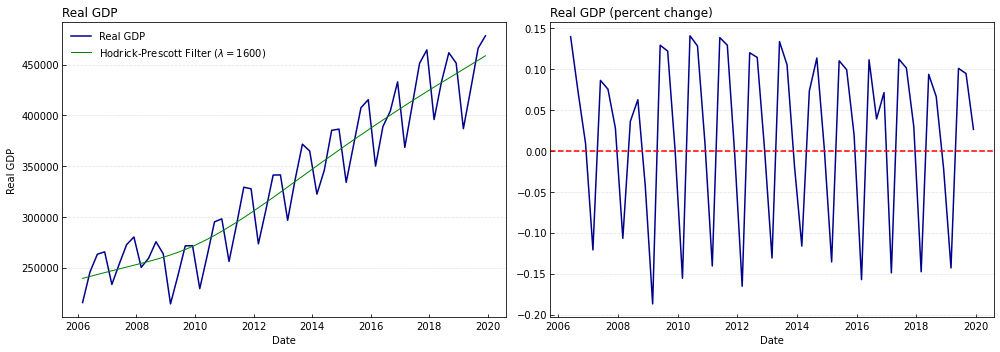

In [ ]:
graph_plot(data["GDP"], "Real GDP")

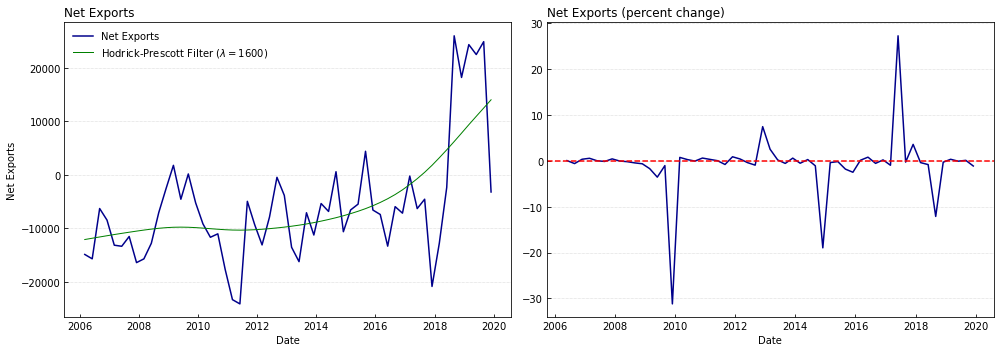

In [ ]:
graph_plot(data["NX"], "Net Exports")

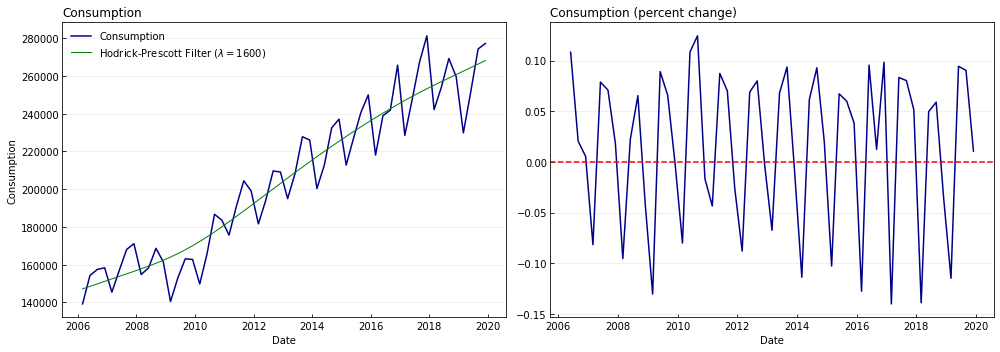

In [ ]:
graph_plot(data["C"], "Consumption")

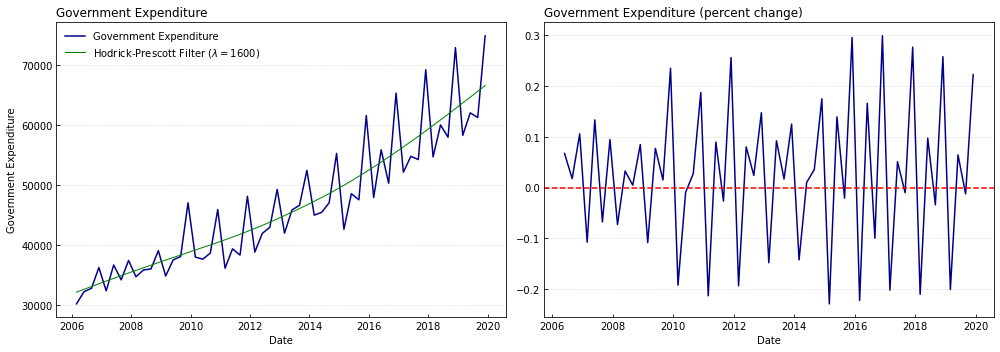

In [ ]:
graph_plot(data["G"], "Government Expenditure")

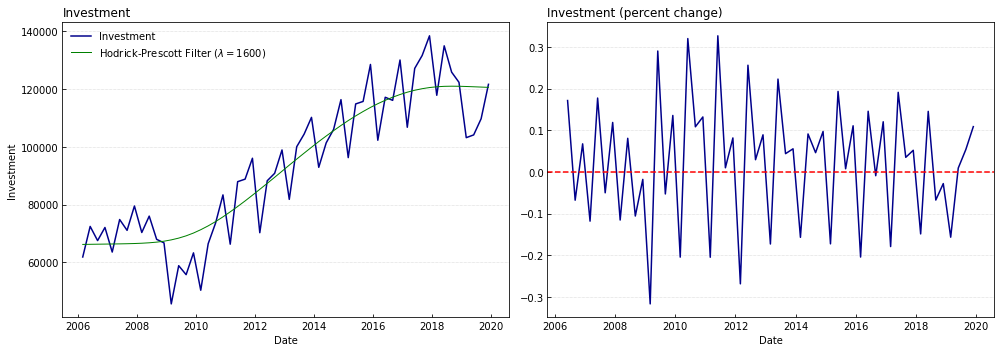

In [ ]:
graph_plot(data["I"], "Investment")

In [ ]:
for column in data:
  data[column] = data[column].pct_change() * 100
data.dropna(inplace = True)
data = data.round(2)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,C,G,E,IM,GDP,I,NX
date,,,,,,,
2006-06-01,10.83,6.71,1.91,2.75,13.95,17.13,5.50
2006-09-01,2.06,1.76,8.70,-7.71,7.15,-6.79,-59.91
2006-12-01,0.56,10.56,4.92,7.98,0.89,6.74,34.39
2007-03-01,-8.16,-10.74,-2.80,4.73,-12.10,-11.81,55.48
2007-06-01,7.89,13.32,-1.30,-0.75,8.62,17.72,1.55


In [ ]:
# ADF test
# null hypothesis : series not stationary (unit root)
# alternate hypothesis : series is stationary
# reject null hypothesis if p-value <= 0.05
def adf_test(data):
    d = 0
    # run ADF test on 1% significance level
    adf_test = adfuller(data.dropna())
    test_statistic,  p_value, crit_value = adf_test[0], adf_test[1], adf_test[4]["1%"]
    while test_statistic > crit_value:
        data = data.diff()
        adf_test = adfuller(data.dropna())
        test_statistic,  p_value, crit_value = adf_test[0], adf_test[1], adf_test[4]["1%"]
        # set order of differencing required for stationarity
        d = d + 1
    # return test results
    return test_statistic, p_value, crit_value, d

In [ ]:
# run the hypothesis test on the data
adf_results = pd.DataFrame(columns = ["t-value", "p-value", "c-value", "d"], 
                       index = ['C', 'G', 'E', 'IM', 'GDP', 'I', 'NX'])
for column in data:
    adf_results.loc[column] = adf_test(data[column])

In [ ]:
adf_results = adf_results.astype(float).round(2)
print(adf_results)

     t-value  p-value  c-value    d
C      -4.31     0.00    -3.57  0.0
G      -3.58     0.01    -3.57  0.0
E      -4.07     0.00    -3.57  0.0
IM     -5.08     0.00    -3.57  0.0
GDP    -4.41     0.00    -3.58  1.0
I      -3.74     0.00    -3.57  0.0
NX     -7.16     0.00    -3.56  0.0


In [ ]:
# difference the data for each indicator if necessary
for i, value in enumerate(adf_results["d"]):
    j = 0
    while j != value:
        data[adf_results.index[i]] = data[adf_results.index[i]].diff()
        j = j + 1
data.dropna(inplace = True)
print(data)

                C      G      E     IM    GDP      I       NX
date                                                         
2006-09-01   2.06   1.76   8.70  -7.71  -6.80  -6.79   -59.91
2006-12-01   0.56  10.56   4.92   7.98  -6.26   6.74    34.39
2007-03-01  -8.16 -10.74  -2.80   4.73 -12.99 -11.81    55.48
2007-06-01   7.89  13.32  -1.30  -0.75  20.72  17.72     1.55
2007-09-01   7.10  -6.76   3.71   0.29  -1.08  -5.01   -13.68
2007-12-01   1.82   9.45   3.79  10.31  -4.77  11.87    42.35
2008-03-01  -9.53  -7.26   6.37   4.05 -13.46 -11.54    -4.26
2008-06-01   2.27   3.26  -8.50 -10.52  14.30   8.06   -18.57
2008-09-01   6.55   0.47   3.81  -5.10   2.65 -10.58   -44.97
2008-12-01  -4.23   8.46  -7.73 -13.71 -10.60  -1.79   -64.25
2009-03-01 -13.04 -10.81  -3.64 -10.98 -14.36 -31.66  -170.88
2009-06-01   8.92   7.71  -1.45  10.92  31.61  29.00  -355.44
2009-09-01   6.59   1.50  18.46   8.62  -0.71  -5.29  -103.81
2009-12-01  -0.19  23.47  -4.75   4.04 -12.14  13.55 -3117.72
2010-03-

In [ ]:
# function for visualization of the autocorrelation
def acf_plot(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,5))
        
    # compute acf values and plot them
    plot_acf(data, ax = ax1, title = "", zero = False, color = "darkblue", 
             alpha = None, lags = 50, use_vlines = True, vlines_kwargs = {"colors": "darkblue"})
    ax1.axhline(y = 2 / np.sqrt(len(data)), color = "red", linestyle = "--")
    ax1.axhline(y = -2 / np.sqrt(len(data)), color = "red", linestyle = "--")
    ax1.set_title("Autocorrelation Function", loc = "left")
    ax1.set_xlabel("Lags")
    ax1.set_ylabel("Autocorrelation")
    ax1.tick_params(direction = "in")
    ax1.grid(axis = "y", linewidth = 0.5, linestyle = ":")
    
    # compute pacf values and plot them
    plot_pacf(data, ax = ax2, title = "", zero = False, color = "darkblue", 
              alpha = None, lags = 50, use_vlines = True, vlines_kwargs = {"colors": "darkblue"})
    ax2.axhline(y = 2 / np.sqrt(len(data)), color = "red", linestyle = "--")
    ax2.axhline(y = -2 / np.sqrt(len(data)), color = "red", linestyle = "--")
    ax2.set_title("Partial Autocorrelation Function", loc = "left")
    ax2.set_xlabel("Lags")
    ax2.set_ylabel("Partial Autocorrelation")
    ax2.tick_params(direction = "in")
    ax2.grid(axis = "y", linewidth = 0.5, linestyle = ":")
    
    # layout optimization
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


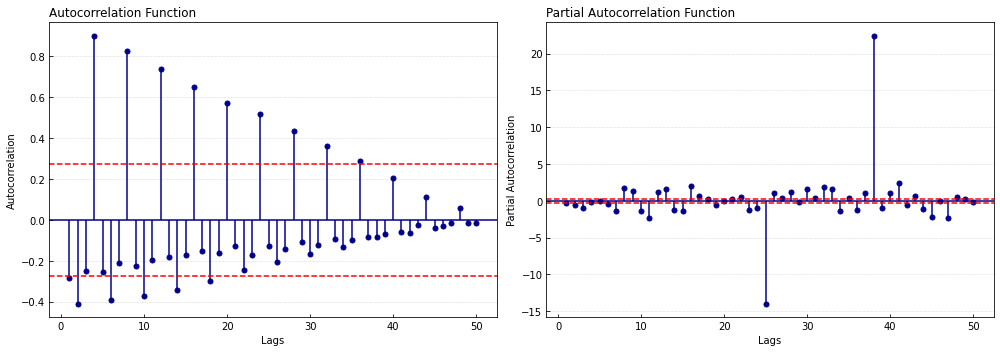

In [ ]:
acf_plot(data["GDP"])

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


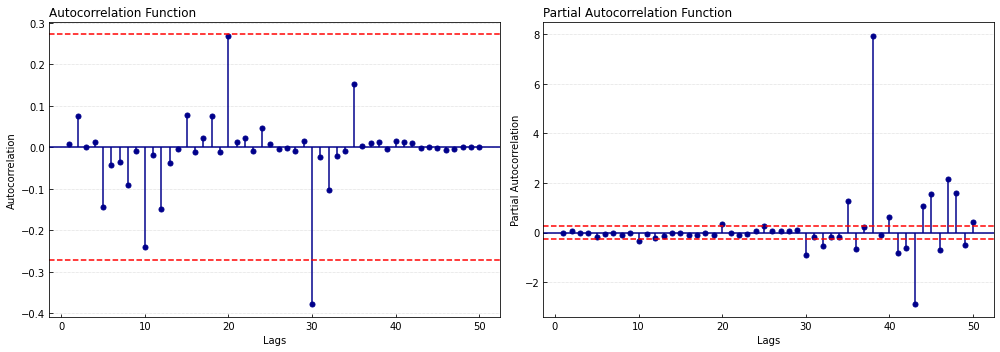

In [ ]:
acf_plot(data["NX"])

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


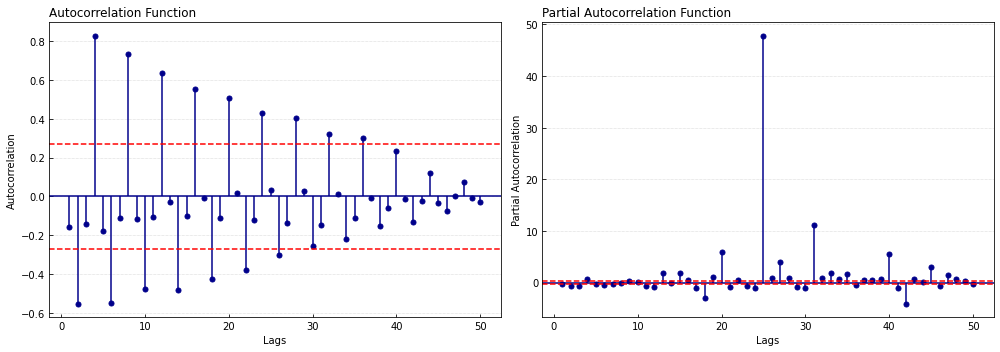

In [ ]:
acf_plot(data["C"])

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


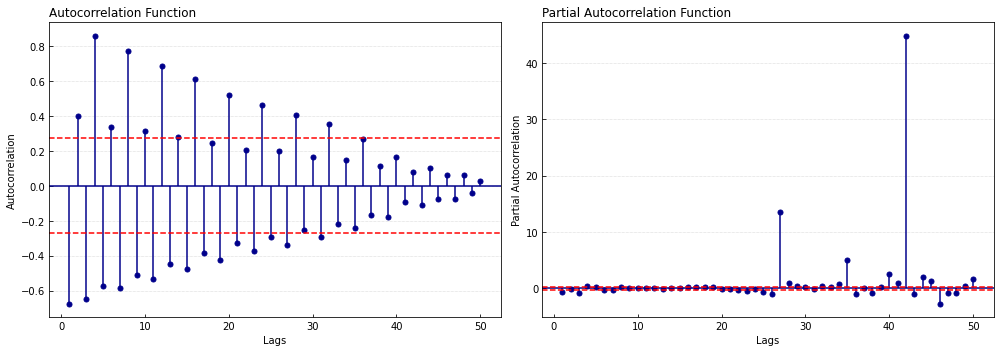

In [ ]:
acf_plot(data["G"])

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


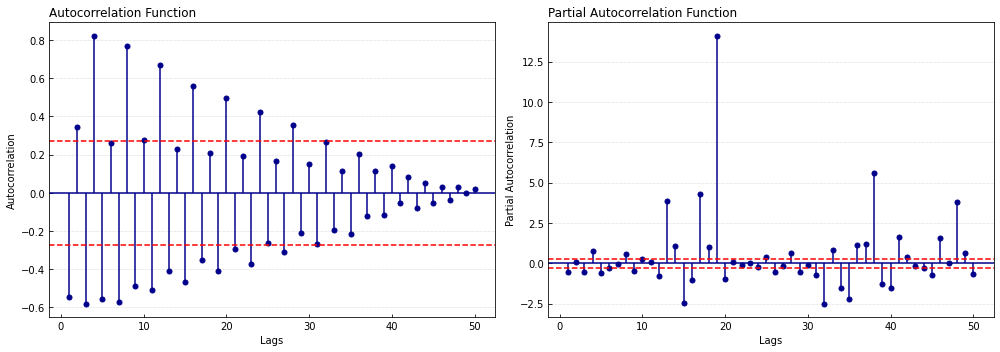

In [ ]:
acf_plot(data["I"])

In [ ]:
# Ljung-Box-Q test
# null hypothesis : data is independently distributed (no autocorrelation)
# alternate hypothesis : data is not independently distributed
# reject null hypothesis if p-value <= 0.05
def lbq_test(data):
    lbq = acorr_ljungbox(data, lags = 52)
    test_statistic, p_value = lbq[0].mean(), lbq[1].mean()
    return test_statistic, p_value

In [ ]:
# run the Ljung-Box-Q test
lbq_results = pd.DataFrame(columns = ["t-value", "p-value"], 
                       index = ['C', 'G', 'E', 'IM', 'GDP', 'I', 'NX'])
for column in data:
    lbq_results.loc[column] = lbq_test(data[column])

In [ ]:
lbq_results = lbq_results.astype(float).round(2)
print(lbq_results)

     t-value  p-value
C     262.69     0.00
G     418.72     0.00
E     150.01     0.01
IM    143.93     0.00
GDP   280.10     0.00
I     355.81     0.00
NX     21.70     0.76


In [ ]:
# Granger-Causality test
# null hypothesis : past values of time-series X do not cause the other series Y
# alternate hypothesis : past values of time-series X cause the other series Y
# reject null hypothesis if p-value <= 0.05
def causality_matrix(data, variables):
    # create empty matrix
    matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), columns = variables, index = variables)
    for c in matrix.columns:
        for r in matrix.index:
            # fill matrix with p-values for each combination of time-series
            test_result = grangercausalitytests(data[[r, c]], maxlag = 16, verbose = False)
            p_values = [test_result[i + 1][0]["ssr_ftest"][1] for i in range(16)]
            min_p_value = np.min(p_values)
            matrix.loc[r, c] = min_p_value
    matrix = matrix.astype(float).round(2)
    return matrix

In [ ]:
print(causality_matrix(data, data.columns))

        C    G     E    IM   GDP     I    NX
C    1.00  0.0  0.09  0.00  0.00  0.00  0.04
G    0.00  1.0  0.00  0.00  0.00  0.00  0.05
E    0.00  0.0  1.00  0.04  0.00  0.00  0.10
IM   0.00  0.0  0.04  1.00  0.04  0.02  0.01
GDP  0.00  0.0  0.00  0.00  1.00  0.00  0.13
I    0.00  0.0  0.00  0.00  0.00  1.00  0.10
NX   0.06  0.0  0.07  0.29  0.05  0.21  1.00


In [ ]:
def training_split(df):
    training = df["2006-03-01":"2017-12-01"]
    testing = df["2018-03-01":"2019-12-01"]
    return training, testing

In [ ]:
names = ["training", "testing"]

In [ ]:
training, testing = training_split(data["GDP"])

In [ ]:
for i, dta in enumerate([training, testing]):
    dta.to_csv("arima_%s.csv" % (names[i]))

In [ ]:
training_2, testing_2 = training_split(data)

In [ ]:
for i, dta in enumerate([training_2, testing_2]):
    dta.to_csv("multivariate_%s.csv" % (names[i]))